# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



In [4]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree,neighbors,linear_model,ensemble
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint,reciprocal
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer

Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [17]:
def linear_regression(input, output):
    alpha = np.dot(input-np.mean(input),output-np.mean(output))/np.sum(np.power(input-np.mean(input),2))
    beta = np.mean(output) - (alpha * np.mean(input))
    return (alpha,beta)

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [18]:
def get_regression_predictions(input, intercept, slope):
    return (input * slope) + intercept 

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [19]:
def get_root_mean_square_error(predicted_values, actual_values):
  return math.sqrt(np.sum(np.power(actual_values-predicted_values,2)))


The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [20]:
def get_r2_score(predicted_values, actual_values):
  return 1 - (np.sum(np.power(actual_values-predicted_values,2))/np.sum(np.power(actual_values-np.mean(predicted_values),2)))


<font color='magenta'>1.</font>

In [5]:
excel_file_path = '/Users/reyhane/Downloads/DataSet.xlsx'
df = pd.read_excel(excel_file_path)
df.info()
df.describe()
df.count()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


CRIM       506
ZN         506
INDUS      506
CHAS       480
NOX        506
RM         506
AGE        506
DIS        479
RAD        506
TAX        506
PTRATIO    506
B          486
LSTAT      506
MEDV       452
dtype: int64

<font color='magenta'>2.</font>

In [6]:
names = list(df.columns.tolist())

missings = [(506-c,1-(c/506)) for c in df.count()]
for i,miss in enumerate(missings):
    print(f"colomn name: {names[i]}, amount of missing values: {miss[0]}, ratio of missing: {round(miss[1],3)}")

colomn name: CRIM, amount of missing values: 0, ratio of missing: 0.0
colomn name: ZN, amount of missing values: 0, ratio of missing: 0.0
colomn name: INDUS, amount of missing values: 0, ratio of missing: 0.0
colomn name: CHAS, amount of missing values: 26, ratio of missing: 0.051
colomn name: NOX, amount of missing values: 0, ratio of missing: 0.0
colomn name: RM, amount of missing values: 0, ratio of missing: 0.0
colomn name: AGE, amount of missing values: 0, ratio of missing: 0.0
colomn name: DIS, amount of missing values: 27, ratio of missing: 0.053
colomn name: RAD, amount of missing values: 0, ratio of missing: 0.0
colomn name: TAX, amount of missing values: 0, ratio of missing: 0.0
colomn name: PTRATIO, amount of missing values: 0, ratio of missing: 0.0
colomn name: B, amount of missing values: 20, ratio of missing: 0.04
colomn name: LSTAT, amount of missing values: 0, ratio of missing: 0.0
colomn name: MEDV, amount of missing values: 54, ratio of missing: 0.107


<font color='magenta'>3.</font>

# Distibution of different features

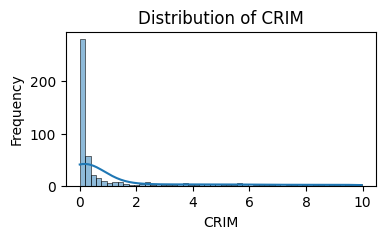

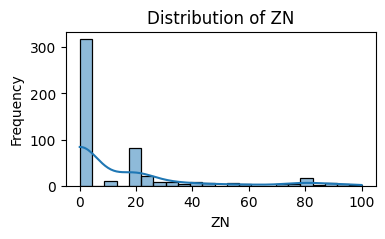

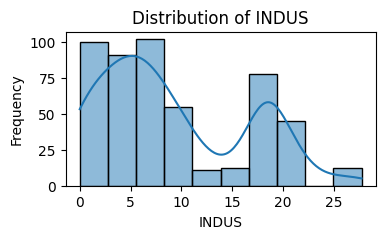

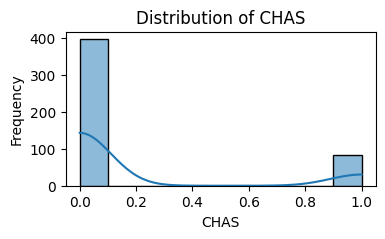

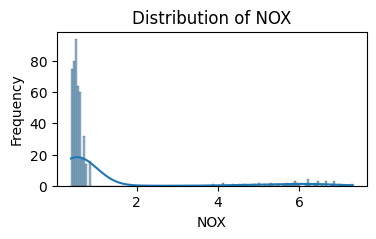

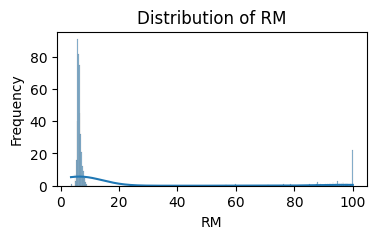

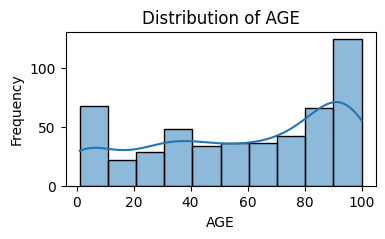

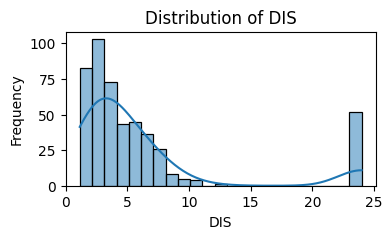

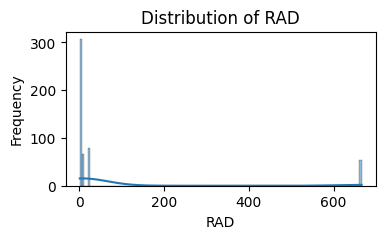

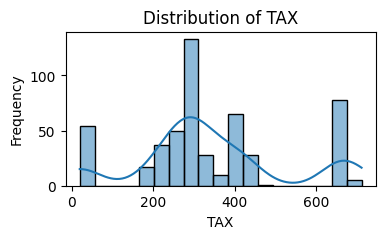

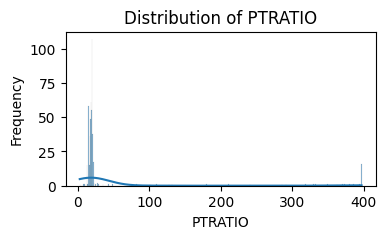

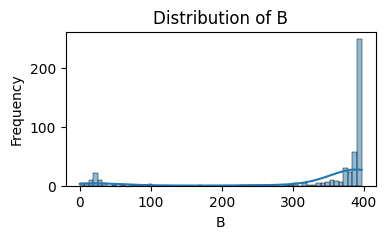

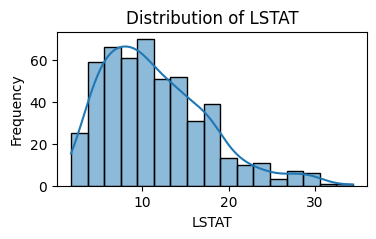

In [7]:
designated_feature_list = df.columns[:-1].tolist()
# Iterate through each feature in designated_feature_list
for feature in designated_feature_list:
    # Plot the distribution of the current feature
    plt.figure(figsize=(4, 2))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

As it is obvious the distribution of different features are not the same and also they differ in the scale.

<font color='magenta'>4.</font>

In [8]:

df.corr(numeric_only = True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.288969,0.586719,-0.108808,-0.139448,-0.185045,0.462470,-0.314674,-0.151996,0.754362,-0.140015,-0.076602,0.392225,-0.286245
ZN,-0.288969,1.000000,-0.491587,0.027097,0.038450,0.078721,-0.488006,0.273419,0.062767,-0.256799,0.049491,0.029200,-0.390092,0.331570
INDUS,0.586719,-0.491587,1.000000,-0.278229,-0.394483,-0.448809,0.700699,-0.613465,-0.427834,0.748951,-0.351166,0.198492,0.465583,-0.411915
CHAS,-0.108808,0.027097,-0.278229,1.000000,0.750855,0.751928,-0.394058,0.705812,0.757421,-0.461679,0.602163,-0.621240,0.052407,0.136668
NOX,-0.139448,0.038450,-0.394483,0.750855,1.000000,0.975767,-0.550065,0.923152,0.985957,-0.570346,0.775302,-0.843068,0.079688,-0.332778
RM,-0.185045,0.078721,-0.448809,0.751928,0.975767,1.000000,-0.595786,0.946355,0.992620,-0.610962,0.806522,-0.830466,0.029450,0.740181
AGE,0.462470,-0.488006,0.700699,-0.394058,-0.550065,-0.595786,1.000000,-0.749412,-0.585574,0.635697,-0.477048,0.377477,0.414354,-0.299893
DIS,-0.314674,0.273419,-0.613465,0.705812,0.923152,0.946355,-0.749412,1.000000,0.947272,-0.697195,0.758289,-0.752246,-0.074013,0.129355
RAD,-0.151996,0.062767,-0.427834,0.757421,0.985957,0.992620,-0.585574,0.947272,1.000000,-0.586540,0.805556,-0.845427,0.056185,-0.217902
TAX,0.754362,-0.256799,0.748951,-0.461679,-0.570346,-0.610962,0.635697,-0.697195,-0.586540,1.000000,-0.485166,0.329963,0.284030,-0.345898


As it is clear, there is a large correlation between MEDV and RM. Also, ZN and LSTAT have a tiny correlation with target(MEDV)

<font color='magenta'>17.</font>

RM feature would give us better result as there is a huge linear correlation between that and the target value which is MEDV. However, we should see in practice.

<font color='magenta'>5.</font>

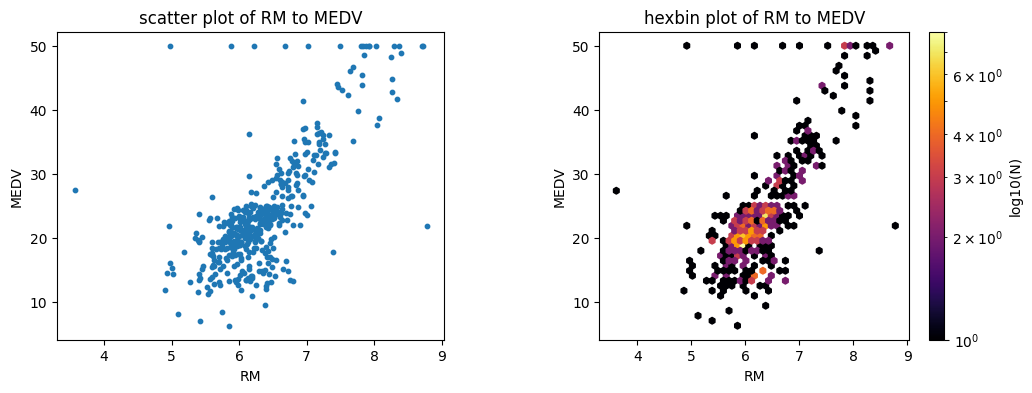

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(df['RM'].to_list(),df['MEDV'].to_list(),s=10)
axs[0].set_title('scatter plot of RM to MEDV')
axs[0].set_ylabel('MEDV')
axs[0].set_xlabel('RM')

hb =axs[1].hexbin(df['RM'].to_list(),df['MEDV'].to_list(),gridsize=50, bins='log', cmap='inferno')
axs[1].set_title('hexbin plot of RM to MEDV')
axs[1].set_ylabel('MEDV')
axs[1].set_xlabel('RM')
cb = fig.colorbar(hb, ax=axs[1], label='log10(N)')

plt.subplots_adjust(wspace=0.4)
plt.show()

A hexbin plot is a type of two-dimensional histogram where data points are binned into hexagonal regions. It is particularly useful for visualizing the distribution of data when you have a large number of data points and overlapping points make it difficult to interpret a scatter plot effectively.

Here's what each component of the hexbin plot does:

Hexagonal Bins: The plot divides the x-y plane into hexagonal bins. Each data point is assigned to the bin that contains it based on its x and y coordinates.

Color Coding: The color of each hexagonal bin represents the number of data points that fall into that bin. Typically, a colormap is used to map the counts to colors. Darker colors indicate a higher density of data points in that bin.

Gridsize: The gridsize parameter determines the number of bins along the x and y directions. Increasing the gridsize results in smaller bins and more detailed visualizations, while decreasing it leads to larger bins and smoother plots.

Log Scaling: In the provided code, the bins='log' parameter specifies that the counts are on a logarithmic scale. This can be useful for visualizing data with a wide range of values, as it emphasizes relative differences in density across bins.

<font color='magenta'>6.</font>

<Axes: >

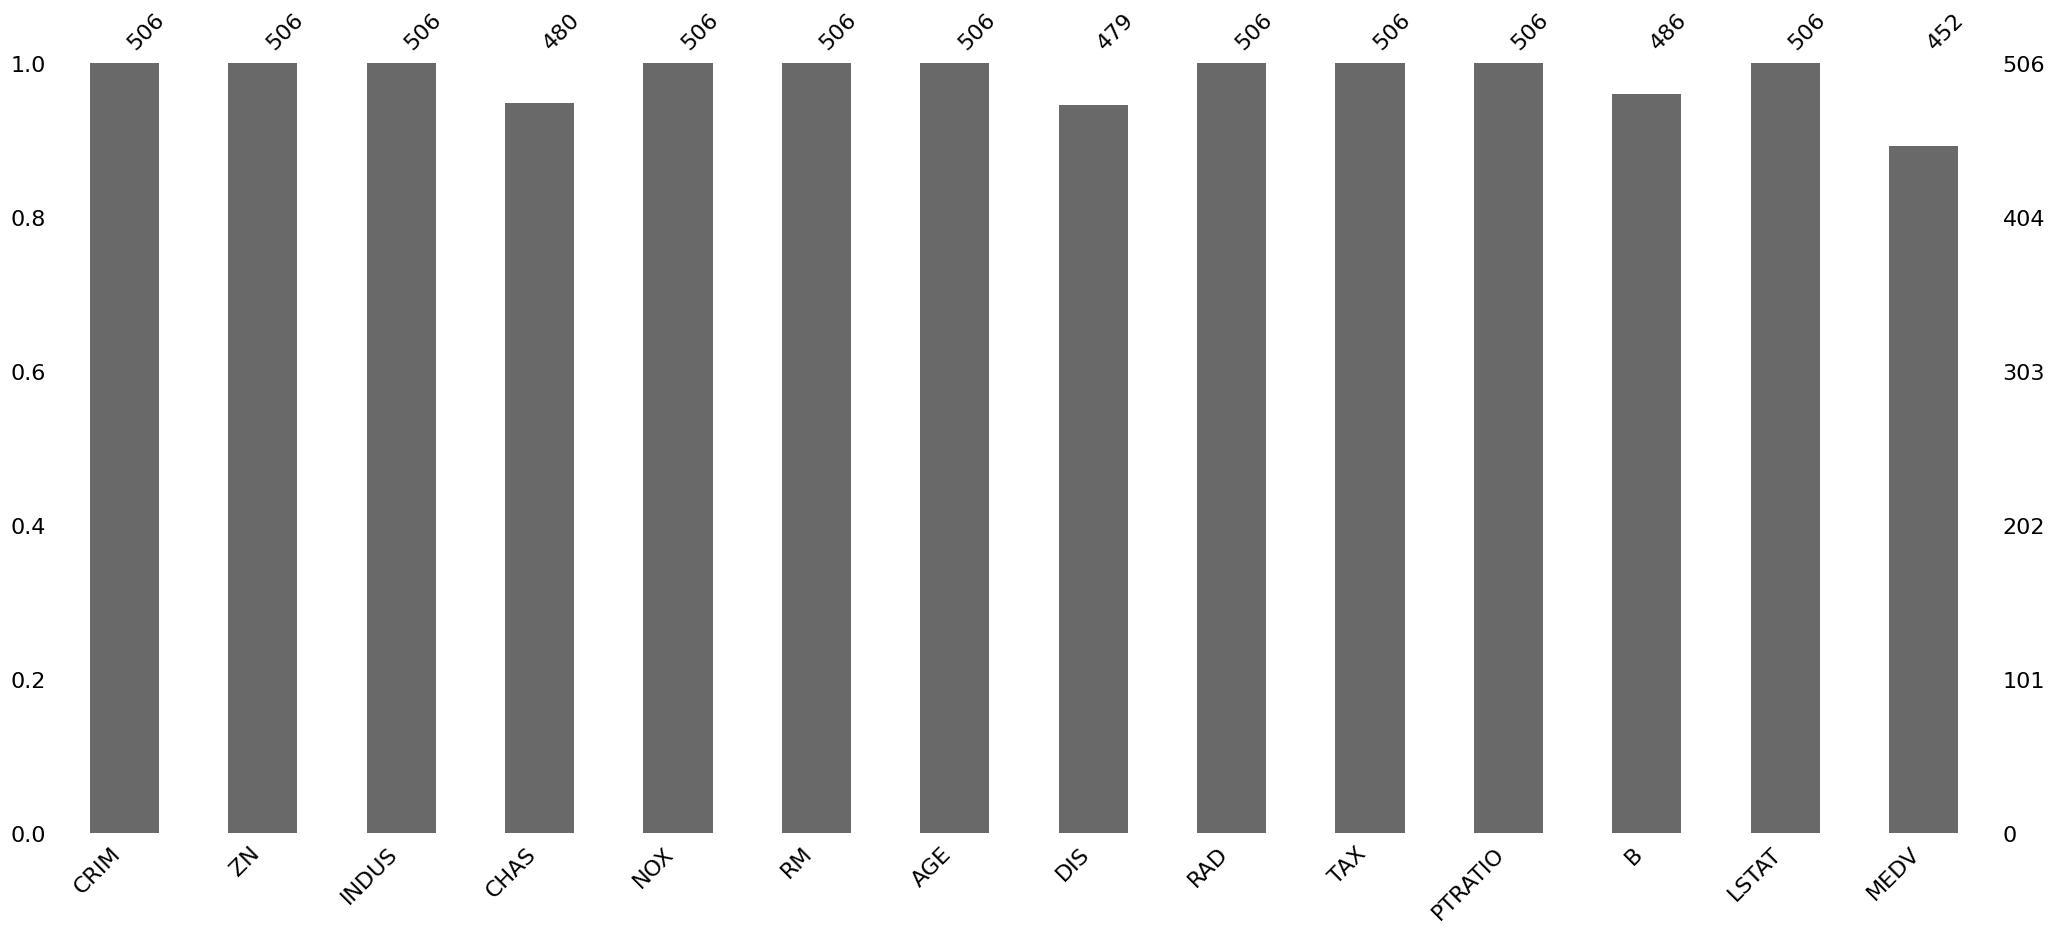

In [10]:
msno.bar(df)

The bar graoh above shows the counts of all features and we can see vividly those which have missing values

<Axes: >

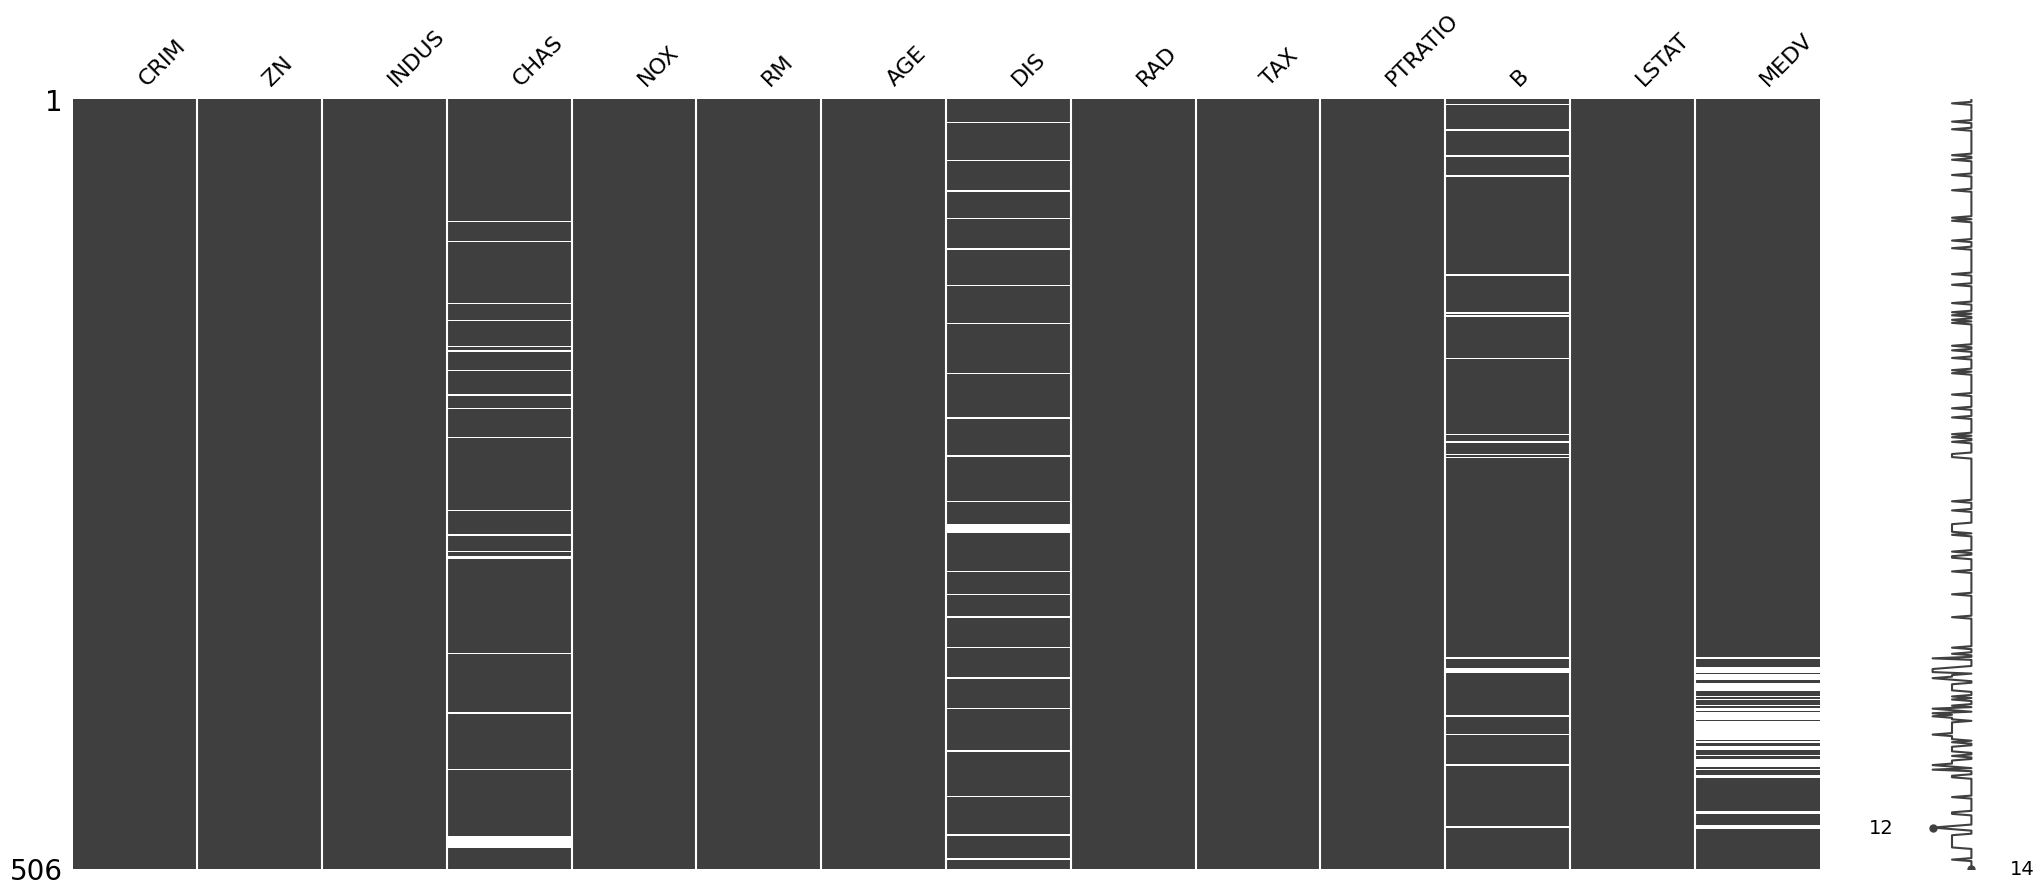

In [11]:
msno.matrix(df)

The msno.matrix() function generates a matrix plot that displays the presence or absence of missing values across all columns of the DataFrame. It provides a quick overview of missingness patterns and helps identify columns with a high proportion of missing values.

# Preprocessing

<font color='magenta'>7.</font>

In [12]:
# Calculate the median values for each column
median_values = df[['MEDV', 'B', 'DIS', 'CHAS']].median()

# Fill missing values with the respective column's median
df_filled = df.fillna(median_values)

# Verify that missing values have been filled
print(df_filled.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


This method is simple and preserves the overall distribution of the data but may introduce bias, especially if the data is not normally distributed.

In [13]:
# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Impute missing values
df_imputed = imputer.fit_transform(df)

# Convert the imputed array back to a DataFrame
df_filled_knn = pd.DataFrame(df_imputed, columns=df.columns)

# Verify that missing values have been filled
print(df_filled_knn.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Replace missing values with the average of the nearest neighbors' values based on similarity in other features. KNN imputation can be effective for datasets with complex relationships between variables but may be computationally intensive.

In [14]:
# Remove rows with any null value
df_cleaned = df.dropna()
# Assuming df is your DataFrame
print("DataFrame Shape:", df.shape)
print("DataFrame Shape cleaned:", df_cleaned.shape)

DataFrame Shape: (506, 14)
DataFrame Shape cleaned: (391, 14)


<font color='magenta'>8.</font>

Here the row deletion has been applied. This strategy preserves the integrity of the remaining data but may lead to loss of valuable information, especially if missingness is not completely random.

<font color='magenta'>9.</font>


Categorical and numerical data are two primary types of data used in statistics and data analysis. They represent different kinds of information and are typically handled and analyzed in different ways.

Categorical Data:

Categorical data represents qualitative variables that can be divided into discrete categories or groups.
Examples of categorical data include gender (male, female), marital status (single, married, divorced), color (red, blue, green), and type of car (sedan, SUV, truck).
Categorical data is often represented using labels or text and does not have a meaningful numerical value associated with it.
Categorical data can be further divided into nominal and ordinal data:
Nominal data: Categories have no inherent order or ranking (e.g., colors).
Ordinal data: Categories have a natural ordering or ranking (e.g., education level: high school, college, graduate school).
Numerical Data:

Numerical data represents quantitative variables that are measured on a continuous or discrete numerical scale.
Examples of numerical data include age, height, weight, temperature, and income.
Numerical data is represented using numerical values (integers or real numbers) that have meaningful magnitude and units.
Numerical data can be further divided into discrete and continuous data:
Discrete data: Values are distinct and separate (e.g., number of siblings).
Continuous data: Values can take on any value within a range (e.g., temperature, height).
Differences:

The main difference between categorical and numerical data lies in the type of information they represent and how they are analyzed:
Categorical data represent qualitative attributes and are typically analyzed using frequency tables, bar charts, or pie charts to summarize and visualize the distribution of categories.
Numerical data represent quantitative measurements and are typically analyzed using descriptive statistics (mean, median, standard deviation) and visualizations such as histograms, box plots, and scatter plots to understand the distribution and relationships between variables.
Categorical data are often used to represent attributes or characteristics, while numerical data are used to represent measurements or quantities.
Categorical data can be nominal or ordinal, while numerical data can be discrete or continuous, depending on the nature of the variable.

In our data set all features and also the target are numerical values.

<font color='magenta'>10.</font>

Standardizing:

Standardizing (also known as z-score normalization) transforms the data so that it has a mean of 0 and a standard deviation of 1.

Standardizing is useful when the features have different scales and you want to compare them on the same scale or when using algorithms that assume normally distributed data (e.g., linear regression, logistic regression).
Standardizing preserves the shape of the original distribution but centers it around 0 with a standard deviation of 1.
Normalizing:

Normalizing (also known as min-max scaling) transforms the data to a fixed range, typically between 0 and 1.

Normalizing is useful when the features have different ranges and you want to scale them to a uniform range.
Normalizing compresses the range of the original data to a fixed interval (e.g., 0 to 1) but does not affect the shape of the distribution.
Differences:

Transformation Method: Standardizing transforms the data based on the mean and standard deviation, while normalizing transforms the data based on the minimum and maximum values.
Output Range: Standardized data has a mean of 0 and a standard deviation of 1, while normalized data typically falls within a fixed range (e.g., 0 to 1).
Effect on Distribution: Standardizing preserves the shape of the original distribution but centers it around 0, while normalizing compresses the range of the data to a fixed interval.

In [15]:
# Extract features from the first row of the DataFrame excluding the last feature
designated_feature_list = df_filled_knn.columns[:-1].tolist()
def normalize_features(chosen_features, data_frame):
    # normalized_data_frame = data_frame.copy()
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame
normalized_dataframe = normalize_features(designated_feature_list, df_filled_knn)

We need to normalize our data beacuse datapoints are not the same in the scaling.

<font color='magenta'>11.</font>

Preprocessing steps for categorical data aim to transform categorical variables into a format that machine learning algorithms can handle effectively. Here are some common preprocessing steps for categorical data:

Encoding:

Many machine learning algorithms require numerical input, so categorical variables need to be encoded into numerical form.
One-hot encoding: This method converts each category value into a new binary column (0 or 1) and is suitable for nominal data where there is no inherent order among categories.
Label encoding: This method assigns a unique integer to each category and is suitable for ordinal data where there is a natural order among categories.
Handling Missing Values:

Missing values in categorical variables can be handled by either imputation or treating them as a separate category.
Imputation: Missing values can be replaced with the most frequent category or a new category indicating missingness.
Treating as a separate category: Missing values can be encoded as a separate category to explicitly represent missingness.
Dimensionality Reduction:

High-cardinality categorical variables (those with a large number of unique categories) can lead to a high-dimensional feature space, which may be computationally expensive or prone to overfitting.
Techniques such as feature hashing or target encoding can be used to reduce the dimensionality of categorical variables while preserving important information.
Feature Scaling:

While categorical variables themselves do not require scaling, if numerical features are combined with encoded categorical features, it's important to scale the numerical features to ensure they have similar magnitudes.
Standardization or normalization can be applied to numerical features, but not to encoded categorical features.
Handling Rare Categories:

Rare or infrequent categories may not have enough information to be useful for prediction and can lead to overfitting.
These categories can be grouped together or merged with other categories based on domain knowledge or statistical analysis.

<font color='magenta'>12.</font>

Training Set:

The training set is used to train the machine learning model.
It contains examples (data points) with known input-output pairs, and the model learns from these examples to make predictions.
The model adjusts its parameters based on the training data to minimize the prediction error.
Validation Set:

The validation set is used to fine-tune the model's hyperparameters and evaluate its performance during training.
It helps prevent overfitting by providing an independent dataset that the model has not seen during training.
The performance metrics on the validation set guide the selection of hyperparameters and inform decisions about model complexity.
Test Set:

The test set is used to assess the final performance of the trained model after hyperparameter tuning and model selection.
It provides an unbiased estimate of the model's generalization error on unseen data.
The test set should only be used once, after all model tuning and selection decisions have been made, to avoid overfitting to the test set.
Now, let's discuss some common ways to split the data into training, validation, and test sets:

Simple Split:

Randomly divide the dataset into training, validation, and test sets using a fixed percentage split (e.g., 70% training, 15% validation, 15% test).
This method is straightforward but may lead to variability in model performance depending on the random seed used for splitting.
K-Fold Cross-Validation:

Divide the dataset into K equal-sized folds.
Train the model K times, each time using K-1 folds for training and the remaining fold for validation.
Average the performance metrics across all K folds to obtain a more reliable estimate of model performance.
This method provides a more robust estimate of model performance and reduces variability compared to a simple split.

<font color='magenta'>13.</font>

Feature engineering involves creating new features or transforming existing features to improve the performance of machine learning models. Effective feature engineering can help capture relevant information from the raw data and lead to more accurate and robust models.

<font color='magenta'>14.</font>

Supervised Learning:

In supervised learning, the model learns from labeled data, where each input is paired with a corresponding target output.
The goal is to learn a mapping from input features to target labels, given the training data.
Examples:
Classification: Predicting whether an email is spam or not spam based on its content (input features) and labeled as spam or not spam (target labels).
Regression: Predicting the price of a house based on features such as square footage, number of bedrooms, and location, given historical sales data with prices.
Unsupervised Learning:

In unsupervised learning, the model learns from unlabeled data, where only input features are provided without corresponding target labels.
The goal is to discover patterns, structures, or relationships in the data without explicit guidance.
Examples:
Clustering: Grouping similar documents together based on their content without knowing their categories.
Dimensionality reduction: Reducing the dimensionality of high-dimensional data while preserving important information, such as using principal component analysis (PCA).
Semi-supervised Learning:

Semi-supervised learning combines elements of both supervised and unsupervised learning, where the model learns from a mixture of labeled and unlabeled data.
The model leverages the labeled data to guide its learning process while also exploiting the additional information provided by the unlabeled data.
Examples:
Text classification with limited labeled data: Using a small set of labeled documents along with a larger set of unlabeled documents to improve the accuracy of a text classifier.
Image classification with partially labeled images: Training a model on a dataset where only a fraction of images are labeled with their corresponding classes.
Reinforcement Learning:

In reinforcement learning, the model learns to make sequential decisions by interacting with an environment to maximize cumulative rewards.
The model learns through trial and error, receiving feedback in the form of rewards or penalties based on its actions.
Examples:
Game playing: Training an AI agent to play chess, where the agent learns to make moves that lead to winning positions and avoids moves that result in losing positions.
Robotics: Teaching a robot to navigate an environment by rewarding it for reaching desired locations and penalizing collisions or incorrect actions.

<font color='magenta'>15.</font>

Regression:

Regression tasks involve predicting a continuous target variable based on input features.
The goal of regression is to learn a mapping from input features to a continuous output, which can represent quantities or numerical values.
Regression models aim to capture the relationship between the input features and the target variable, allowing for predictions of unseen data points.
Examples of regression tasks include predicting house prices, stock prices, temperature, or sales revenue based on relevant features such as square footage, historical prices, weather data, or marketing expenditure.
Classification:

Classification tasks involve predicting a categorical target variable or class label based on input features.
The goal of classification is to learn a decision boundary that separates different classes or categories in the feature space.
Classification models aim to assign input data points to predefined classes or categories, enabling the identification of patterns or structures in the data.
Examples of classification tasks include spam email detection, sentiment analysis, disease diagnosis, or image recognition, where the target variable represents discrete labels such as "spam" or "not spam," "positive" or "negative," "healthy" or "diseased," or object categories.
Key Differences:

Output Variable:

In regression, the output variable is continuous and represents a numerical value or quantity.
In classification, the output variable is categorical and represents class labels or discrete categories.
Model Output:

Regression models output a single continuous value that represents the predicted outcome.
Classification models output class probabilities or discrete class labels indicating the predicted category for each input data point.
Evaluation Metrics:

Regression models are evaluated using metrics such as mean squared error (MSE), mean absolute error (MAE), or 
𝑅
2
R 
2
  coefficient of determination.
Classification models are evaluated using metrics such as accuracy, precision, recall, F1-score, or area under the receiver operating characteristic (ROC) curve (AUC-ROC), depending on the nature of the problem and the class imbalance.
Decision Boundaries:

In regression, the relationship between input features and the target variable is represented by a continuous function, and decision boundaries are not applicable.
In classification, decision boundaries separate different classes or categories in the feature space, defining regions where the predicted class label changes.

<font color='magenta'>18.</font>

RSS calculates total discrepancy between our estimation and training data. MSE calculates the average of squares error. RMSD calculates root of MSE and measures standard deviation of residuals of the model. R2 score is a value between 0 and 1. It caclulates how our model fits data.

<font color='magenta'>19.</font>

In [21]:
# Extract features from the first row of the DataFrame excluding the last feature
designated_feature_list = normalized_dataframe.columns[:-1].tolist()

# Print the features to ensure accuracy
print("Features List (excluding the last feature):")
print(designated_feature_list)


for feature in designated_feature_list:
  x = normalized_dataframe[feature].to_numpy()
  # print(f"x : {x}")
  y = normalized_dataframe['MEDV'].to_numpy()
  # print(f"y:{y}")
  x_train,x_test,y_train,y_test = train_test_split(x,y)
  # print(y_train)
  alpha,beta = linear_regression(x_train,y_train)
  # print(alpha)
  y_pred = get_regression_predictions(x_test,beta,alpha)
  print(f"RMSE ERROR for {feature}: {get_root_mean_square_error(y_pred,y_test)}")
  print(f"R2 SCORE for {feature}: {get_r2_score(y_pred,y_test)}")

Features List (excluding the last feature):
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
RMSE ERROR for CRIM: 91.88519007385244
R2 SCORE for CRIM: 0.023144771633190286
RMSE ERROR for ZN: 87.08121010088942
R2 SCORE for ZN: 0.1528486179752453
RMSE ERROR for INDUS: 91.4967599766384
R2 SCORE for INDUS: 0.1591719548695314
RMSE ERROR for CHAS: 94.65363311547449
R2 SCORE for CHAS: -0.011455950186492592
RMSE ERROR for NOX: 95.42013950843851
R2 SCORE for NOX: 0.020785337051118846
RMSE ERROR for RM: 104.18198717915338
R2 SCORE for RM: 0.010459828332924803
RMSE ERROR for AGE: 88.41828152749056
R2 SCORE for AGE: 0.08474912447256289
RMSE ERROR for DIS: 104.46931085806648
R2 SCORE for DIS: 0.01955807013427069
RMSE ERROR for RAD: 107.23724899776434
R2 SCORE for RAD: 0.0041075343169620915
RMSE ERROR for TAX: 77.80919885116136
R2 SCORE for TAX: 0.2158508784103672
RMSE ERROR for PTRATIO: 105.90120006426778
R2 SCORE for PTRATIO: -0.008388932010922945
R

It show that the linear regression performs best on the LSTAT feature. The feature with the highest Pearson correlation (RM) may be highly correlated with other features in the dataset so its high pearson correlation coefficient doesnt mean that LR perfoms well on that.

<font color='magenta'>20.</font>

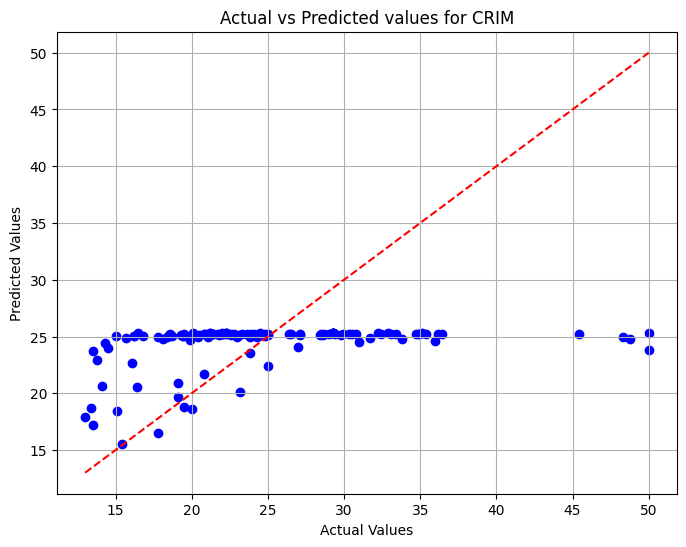

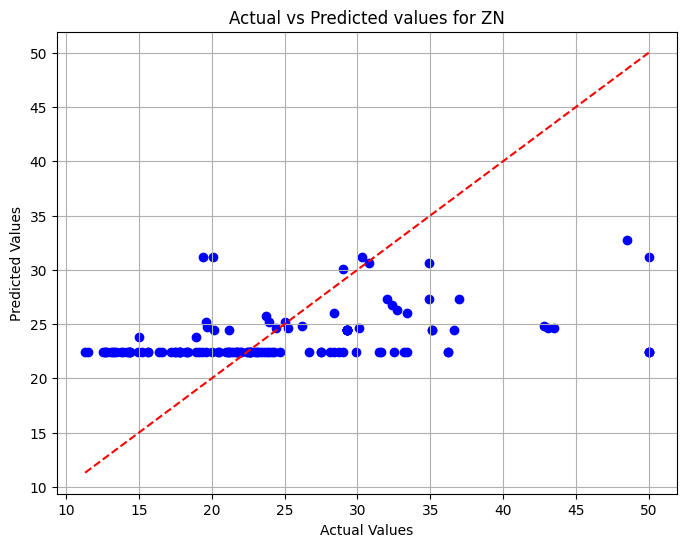

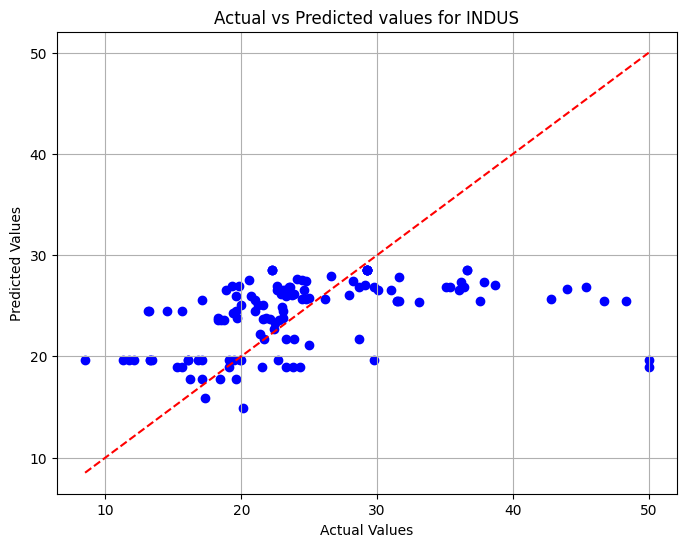

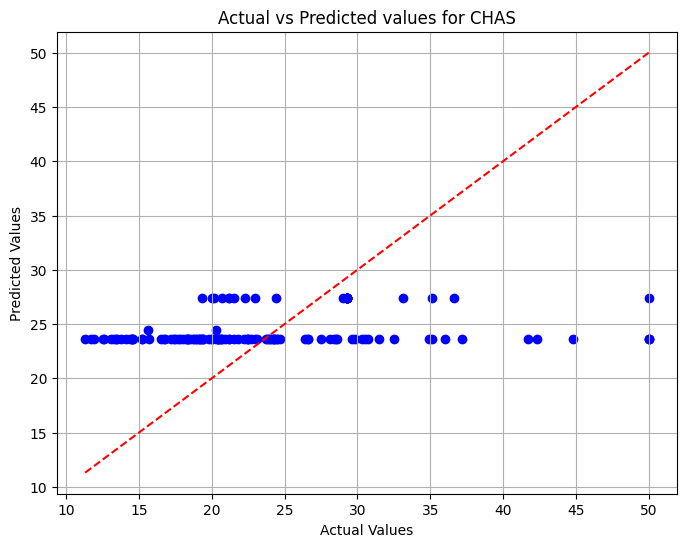

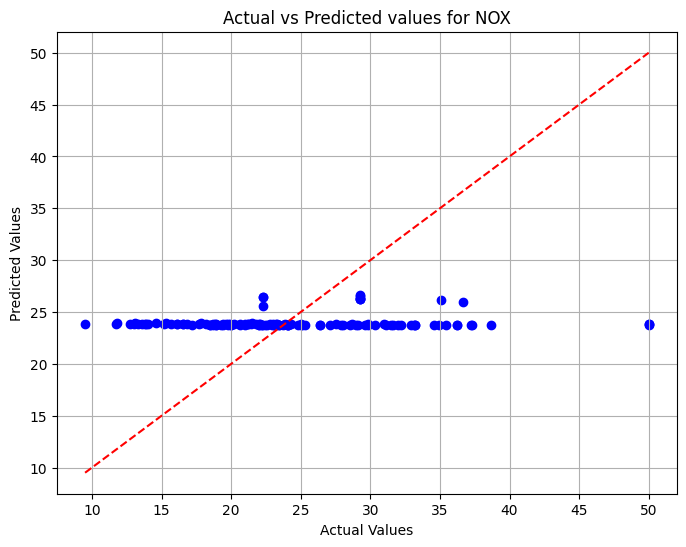

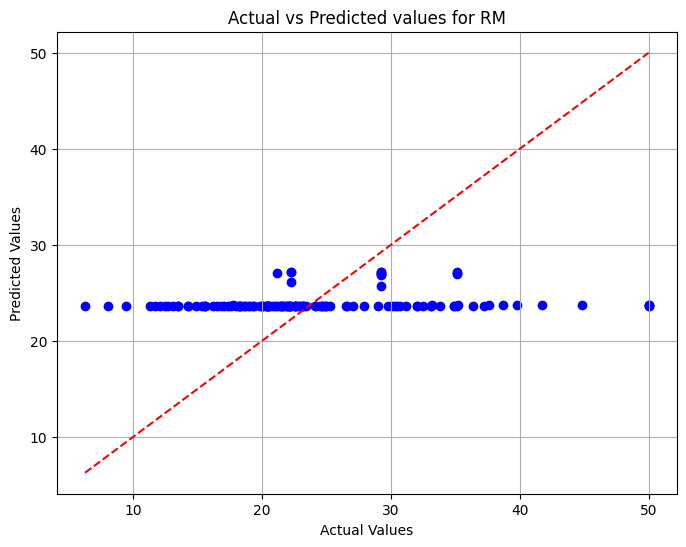

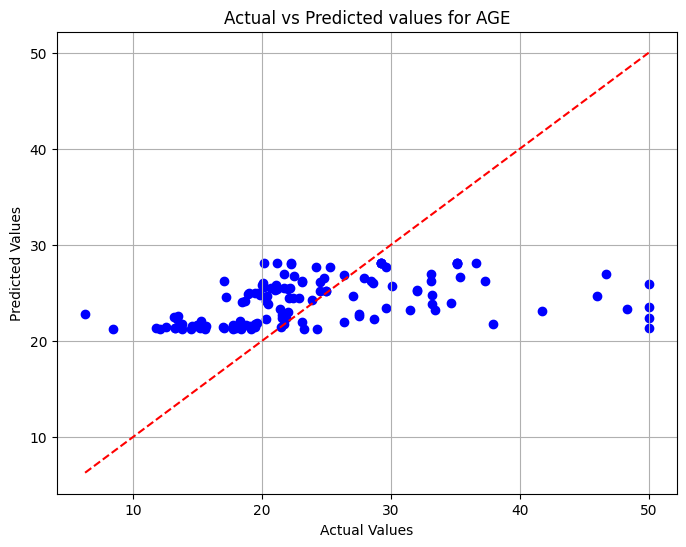

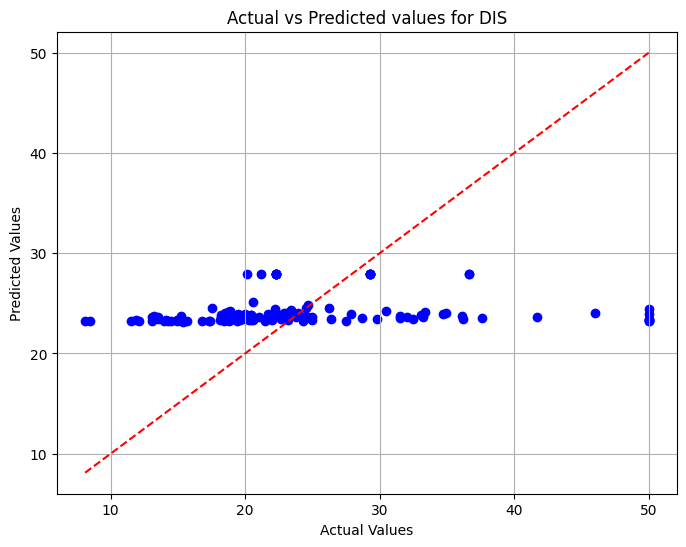

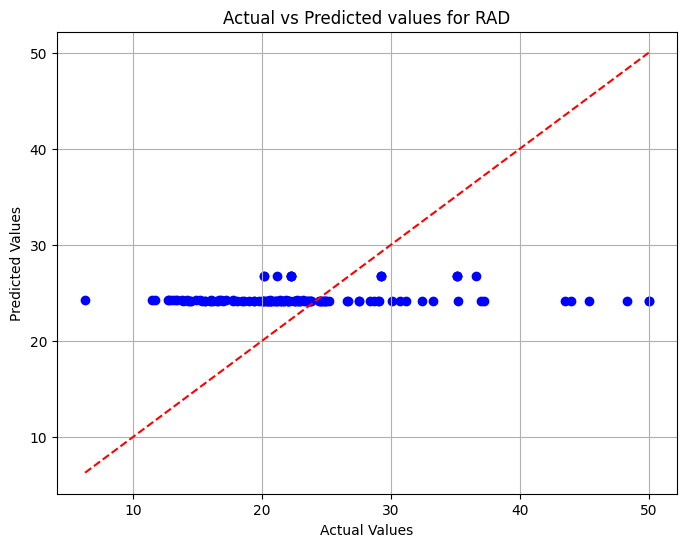

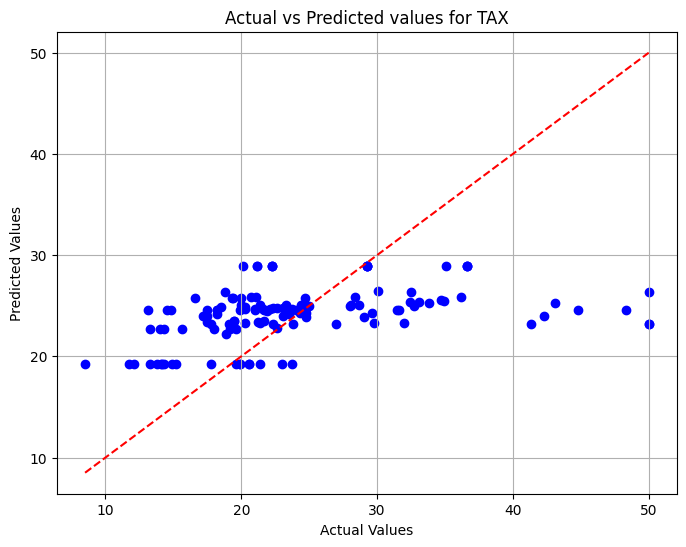

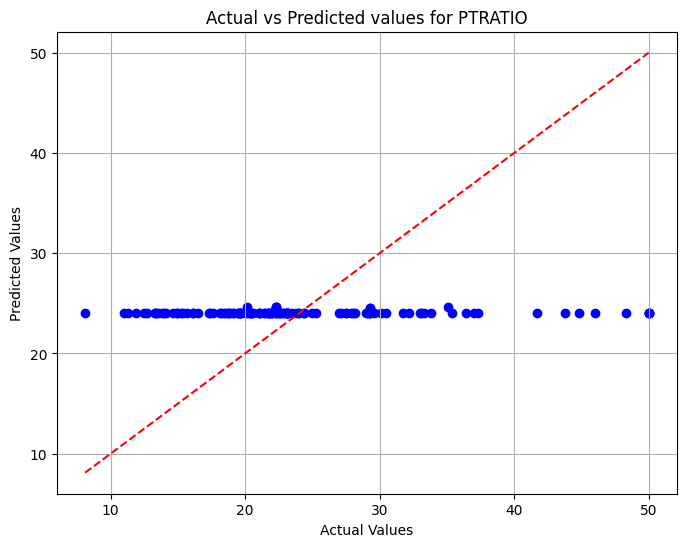

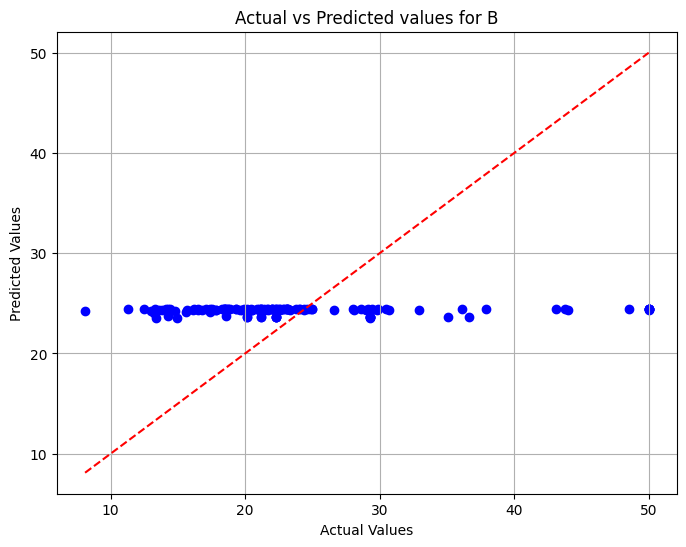

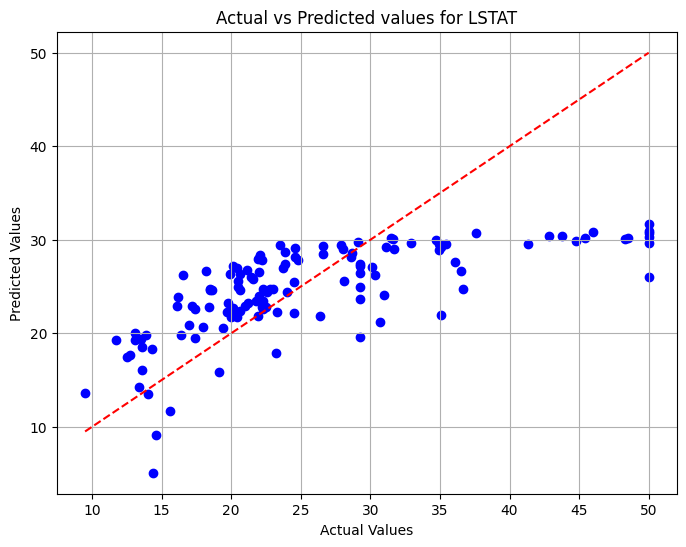

In [22]:
# Iterate through each feature in designated_feature_list
for feature in designated_feature_list:
    # Extract feature values
    x = normalized_dataframe[feature].to_numpy()
    y = normalized_dataframe['MEDV'].to_numpy()

    # Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # Perform linear regression
    alpha, beta = linear_regression(x_train, y_train)

    # Predict using regression model
    y_pred = get_regression_predictions(x_test, beta, alpha)

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f'Actual vs Predicted values for {feature}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

As it can be seen, the LSTAT feature ends with a closer line to y=x. The r^2 score is big enough to justify it.

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [362]:
def feature_derivative(errors, feature):
  return -2 * np.dot(errors, feature)
    

# Decisoin Tree

<font color='magenta'>21.</font>


Pruning is a technique used in decision tree learning to reduce the size of a decision tree by removing parts of the tree that do not provide significant predictive power or that may lead to overfitting. The goal of pruning is to create a simpler and more generalizable decision tree model that performs well on unseen data.
Underfitting Risk:

Pruning may lead to underfitting if the tree is prematurely pruned before it can capture important patterns in the data.
Computational Overhead:

Post-pruning, in particular, may require additional computational resources and time to grow the full tree before pruning.

Overfitting Potential:

Despite pruning, there is still a risk of overfitting if pruning is not performed effectively or if the validation data is not representative of the true test data.

<font color='magenta'>22.</font>

Interpretability:

Decision trees are highly interpretable and easy to understand, making them suitable for applications where model transparency and explainability are important. The decision rules learned by a decision tree can be visualized and easily communicated to stakeholders.
Handling Non-linear Relationships:

Decision trees can capture non-linear relationships between features and the target variable without the need for feature engineering or transformation. They are well-suited for datasets with complex interactions and non-linear decision boundaries.
Mixed Data Types:

Decision trees can handle both numerical and categorical features seamlessly without requiring explicit encoding or normalization. This makes them versatile for datasets with mixed data types and avoids the need for preprocessing steps such as one-hot encoding.

<font color='magenta'>23.</font>

Training Process: kNN does not involve an explicit training phase. Instead, it stores the entire training dataset in memory.
Prediction: To make predictions for a new data point, kNN retrieves the k nearest neighbors from the training dataset based on a distance metric (e.g., Euclidean distance).
Training Process: Logistic regression learns the parameters (weights) of the model using optimization algorithms such as gradient descent or Newton's method. It minimizes a cost function (e.g., logistic loss or cross-entropy loss) to find the optimal weights that best fit the data.

<font color='magenta'>24.</font>

the 1-nearest neighbor algorithm offers simplicity, adaptability, and non-parametric flexibility, making it suitable for certain types of problems. However, its computational complexity, memory usage, and sensitivity to noise and outliers are important considerations when choosing this algorithm for a given task.

<font color='magenta'>25.</font>

In the k-Nearest Neighbors (k-NN) algorithm, various distance measures can be used to quantify the similarity or dissimilarity between data points in the feature space.

Euclidean Distance
Manhattan Distance
Cosine Similarity

<font color='magenta'>26.</font>


first we should split the MEDV column into three labels namely Expensive, Average, and Economic.
For doing so we need to show the distibution over the MEDV values and consider the two first deciles as the Economic ones, the two last deciles as Expensive houeses, and lastly the other deciles as the Avergae house.

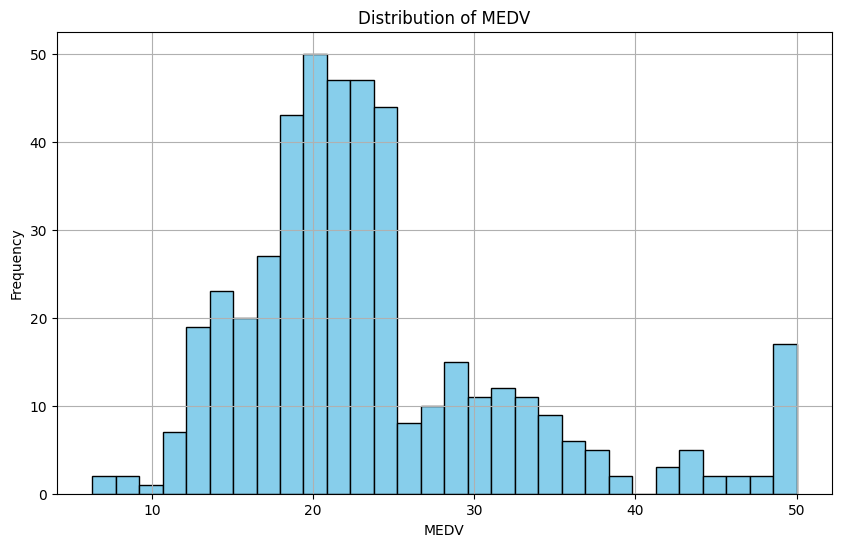

First Nine Deciles:
Decile 1: 14.9
Decile 2: 18.0
Decile 3: 19.6
Decile 4: 21.0
Decile 5: 22.259999999999998
Decile 6: 23.400000000000006
Decile 7: 25.15
Decile 8: 29.279999999999994
Decile 9: 35.1


In [23]:
# Plot the distribution of the 'MEDV' column
plt.figure(figsize=(10, 6))
plt.hist(df['MEDV'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate and print the first nine deciles
deciles = df_filled_knn['MEDV'].quantile([0.1 * i for i in range(1, 10)])
print("First Nine Deciles:")
for i, decile in enumerate(deciles, start=1):
    print(f"Decile {i}: {decile}")

In [24]:

# Define a function to categorize the values in the 'MEDV' column
def categorize_MEDV(value, deciles):
    if value <= deciles[0.2]:  # Economic houses (under the 2nd decile)
        return 'Economic'
    elif value >= deciles[0.8]:  # Expensive houses (above the 8th decile)
        return 'Expensive'
    else:  # Average houses (others)
        return 'Average'

# Calculate the deciles
deciles = df_filled_knn['MEDV'].quantile([0.1 * i for i in range(1, 10)])

# Apply the categorize_MEDV function to create a new column 'MEDV_Category_Custom'
df_filled_knn.loc[:, 'MEDV_Category_Custom'] = df_filled_knn['MEDV'].apply(categorize_MEDV, args=(deciles,))

# Display the DataFrame with the new column
print(df_filled_knn.head())

       CRIM        ZN     INDUS     CHAS       NOX        RM       AGE  \
0 -0.526372  0.204122 -0.961717 -0.46963 -0.341942 -0.334487  0.195002   
1 -0.517623 -0.576833 -0.297806 -0.46963 -0.383837 -0.340144  0.608848   
2 -0.517632 -0.576833 -0.297806 -0.46963 -0.383837 -0.312077  0.071150   
3 -0.515514 -0.576833 -0.979850 -0.46963 -0.390515 -0.318947 -0.391029   
4 -0.500226 -0.576833 -0.979850 -0.46963 -0.390515 -0.313473 -0.137284   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  MEDV  \
0 -0.322105 -0.378611 -0.239762 -0.311867  0.512084 -1.081266  24.0   
1 -0.186687 -0.373698 -0.538649 -0.283324  0.512084 -0.395356  21.6   
2 -0.186687 -0.373698 -0.538649 -0.283324  0.479599 -1.237904  34.7   
3 -0.017610 -0.368785 -0.649348 -0.273048  0.484196 -1.417626  33.4   
4 -0.017610 -0.368785 -0.649348 -0.273048  0.512084 -1.023557  36.2   

  MEDV_Category_Custom  
0              Average  
1              Average  
2            Expensive  
3            Expensive  
4  

In [25]:

x_train,x_test,y_train,y_test = train_test_split(np.array(df_filled_knn[designated_feature_list]),df_filled_knn['MEDV_Category_Custom'])
print(y_test.shape)

(127,)


<font color='magenta'>27.</font>

Fitting 3 folds for each of 980 candidates, totalling 2940 fits


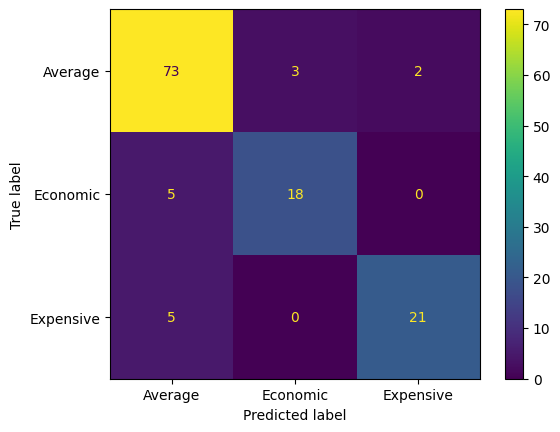

test f1 score: 0.8806048453429487
train f1 score: 0.9015334050410142
Accuracy: 0.8818897637795275
Precision: 0.8823293369104136
Recall: 0.8818897637795275


In [26]:
params = {'max_leaf_nodes': list(range(2, 100)), 'max_depth': list(range(5, 10)),'criterion':['entropy','gini']}
dtree = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dtree.fit(x_train,y_train)
predictions = dtree.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtree.classes_)
disp.plot()
plt.show()
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"test f1 score: {f1_score(y_test,predictions,average='weighted')}")
predictions = dtree.predict(x_train)
print(f"train f1 score: {f1_score(y_train,predictions,average='weighted')}")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

No underfitting or overfitting can be observed. It is just fine

<font color='magenta'>28.</font>

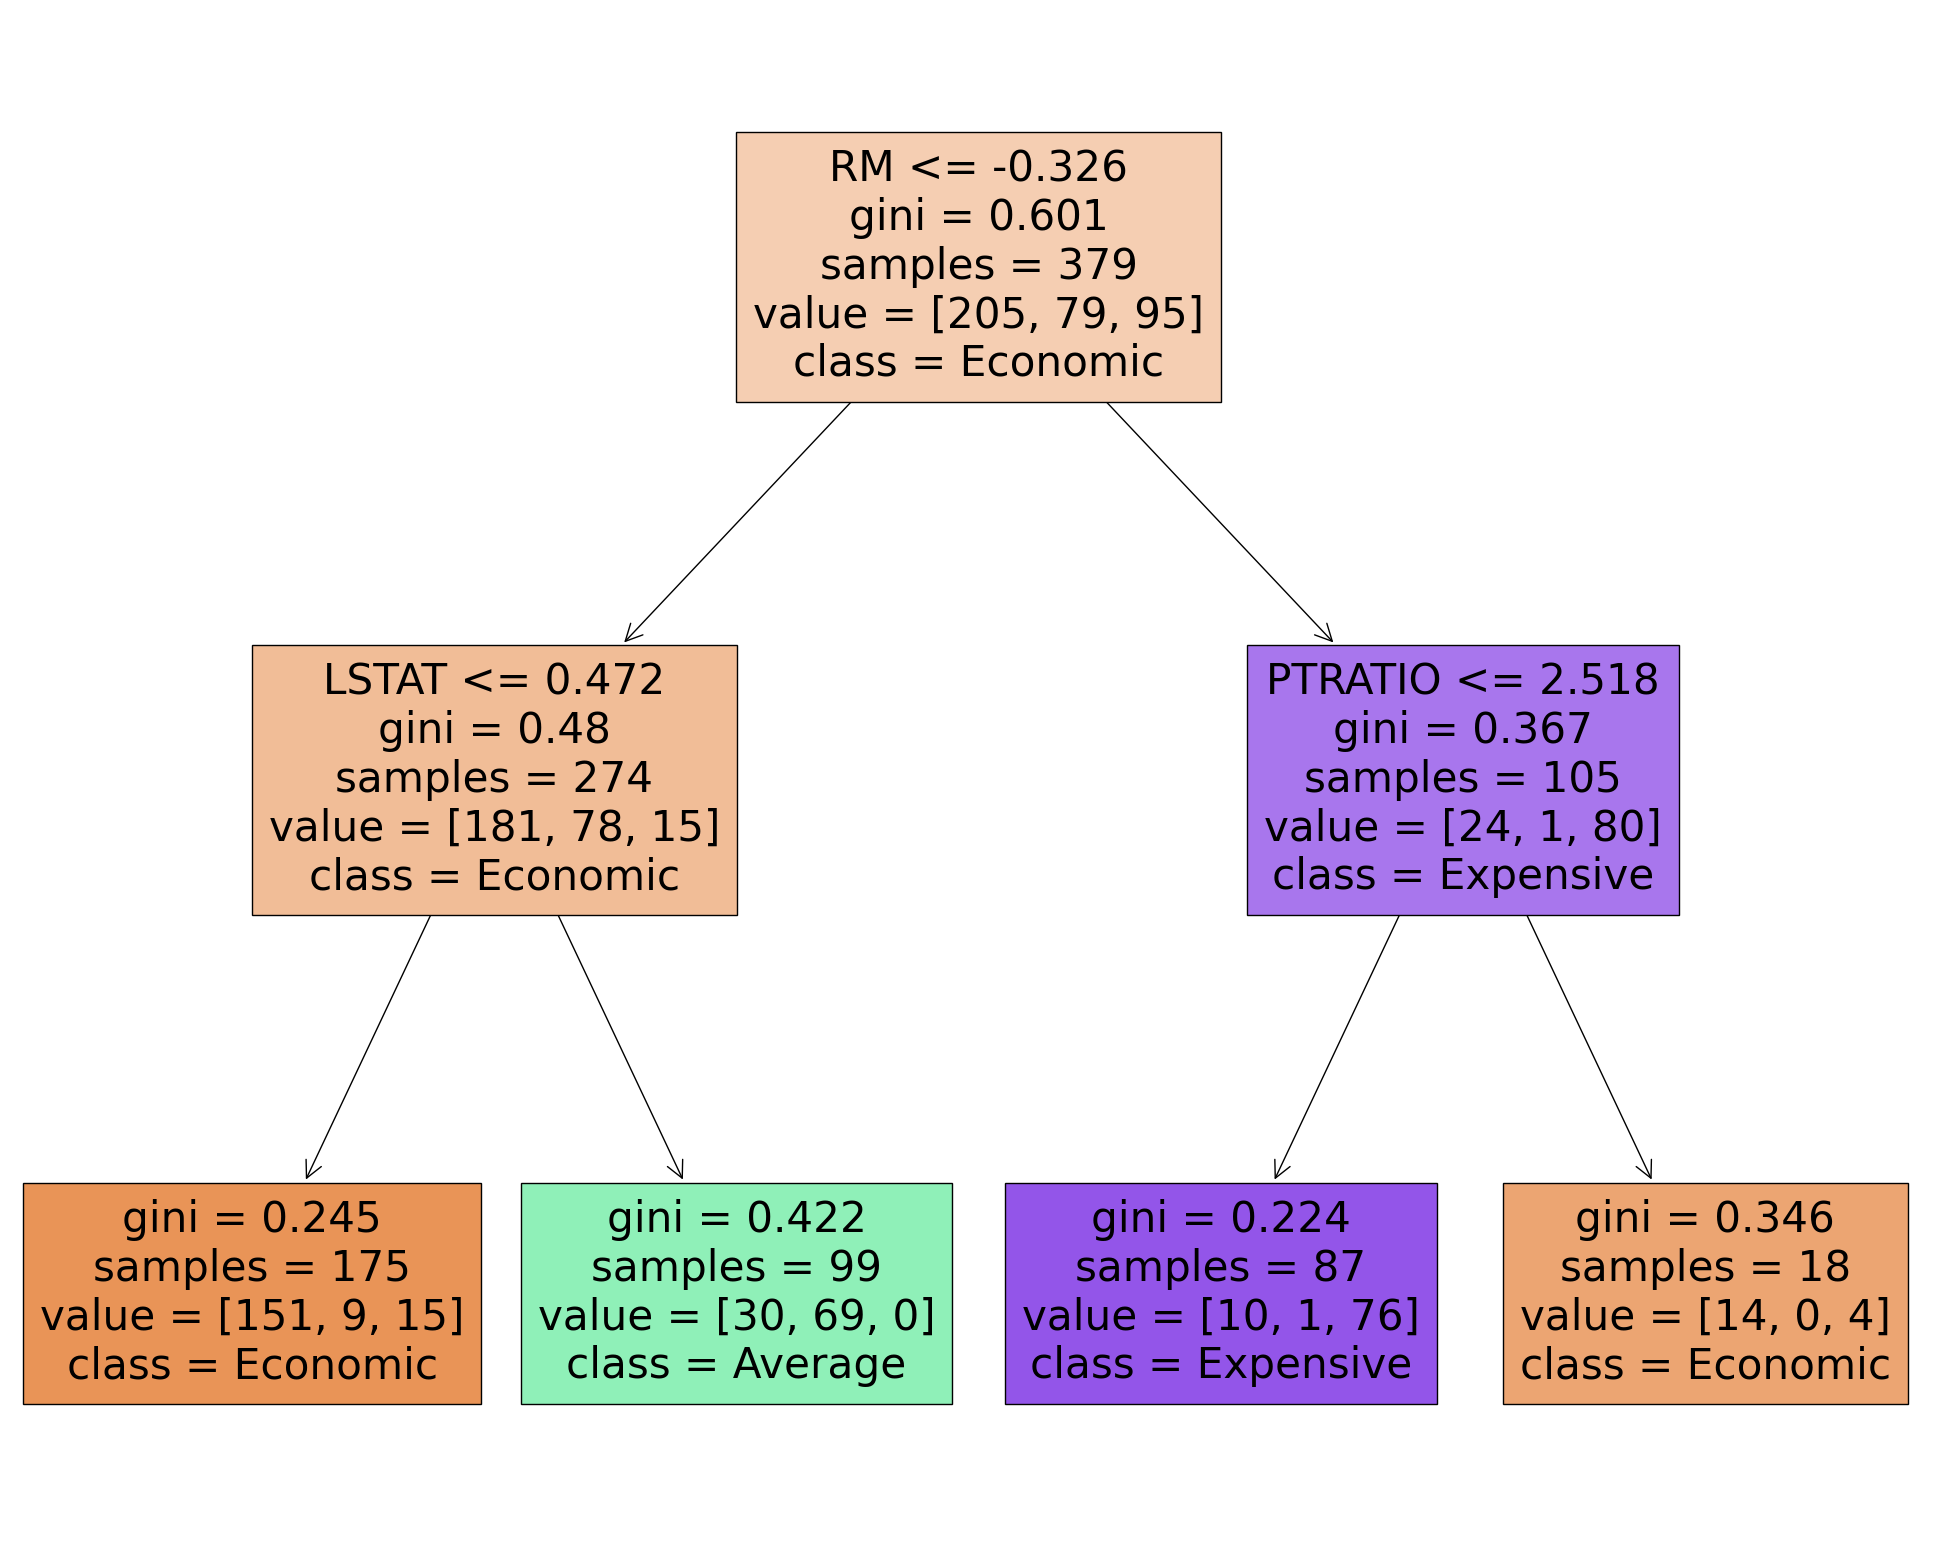

In [27]:
# the parameter here which is max_depth=2 has been reached via trial and error
dtree = tree.DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train,y_train)
predictions = dtree.predict(x_test)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=designated_feature_list,  
                   class_names=['Economic','Average', 'Expensive'],
                   filled=True)

<font color='magenta'>26.</font>
This is our model results which underwent trial and error

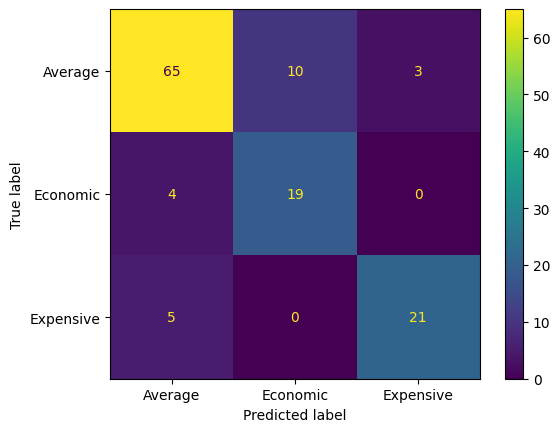

test f1 score: 0.8295922726258409
train f1 score: 0.8194267143106982
Accuracy: 0.8267716535433071
Precision: 0.8372636144153929
Recall: 0.8267716535433071


In [28]:
predictions = dtree.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=dtree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtree.classes_)
disp.plot()
plt.show()
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')

print(f"test f1 score: {f1_score(y_test,predictions,average='weighted')}")
predictions = dtree.predict(x_train)
print(f"train f1 score: {f1_score(y_train,predictions,average='weighted')}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

No uderfititg or overfitting can be observed. It is just fine.

<font color='magenta'>29.</font>

Underfitting occurs when the model is too simple, and overfitting occurs when the model is too complex. Balancing between these two extremes is essential to develop a model that generalizes well to unseen data. 

# KNN

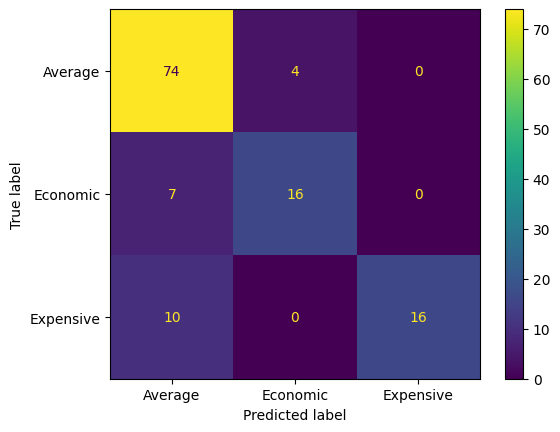

Accuracy: 0.8346456692913385
Precision: 0.8490438695163105
Recall: 0.8346456692913385
F1 Test Score: 0.8286101983227052
train f1 score: 0.8194267143106982


In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(x_train, np.squeeze(y_train))

# Make predictions on the test data
predictions = knn.predict(x_test)

# Calculate confusion matrix
cm = confusion_matrix(np.squeeze(y_test), predictions, labels=np.unique(y_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot()
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Test Score: {f1}")

predictions = dtree.predict(x_train)
print(f"train f1 score: {f1_score(y_train,predictions,average='weighted')}")



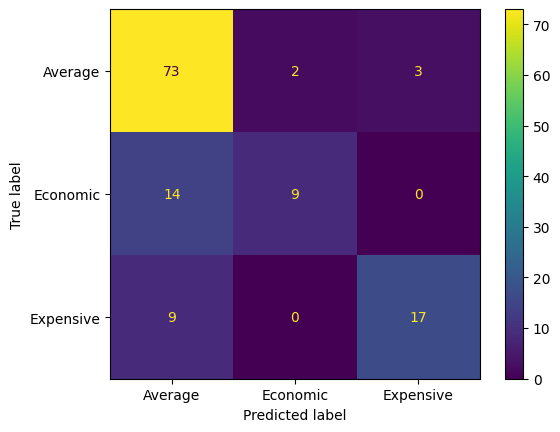

test f1 score: 0.762536517753166
train f1 score: 0.8194267143106982
Accuracy: 0.7795275590551181
Precision: 0.7892179670722977
Recall: 0.7795275590551181


In [30]:
params = {'n_neighbors':[i for i in range(1,10,1)]}
knn = GridSearchCV(neighbors.KNeighborsClassifier(),param_grid=params)
knn.fit(x_train,np.squeeze(y_train))
predictions = knn.predict(x_test)
cm = confusion_matrix(np.squeeze(y_test), predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"test f1 score: {f1_score(y_test,predictions,average='weighted')}")
predictions = dtree.predict(x_train)
print(f"train f1 score: {f1_score(y_train,predictions,average='weighted')}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

No overfiting or underfiting is observed.

# Ensemble Learning

<font color='magenta'>30.</font>

Improved Accuracy:

Ensemble methods combine multiple base models (weak learners) to create a stronger, more accurate predictive model. By aggregating the predictions of multiple models, ensemble methods can often achieve better performance than any individual model.
Robustness to Overfitting:

Ensemble methods help mitigate overfitting by reducing the variance of the model. By combining diverse models trained on different subsets of data or using different algorithms, ensemble methods reduce the risk of capturing noise or outliers present in the training data.
Capturing Complex Relationships:

Ensemble methods can capture complex relationships in the data that may be missed by individual models. By combining diverse models that specialize in different aspects of the data, ensemble methods can better approximate the true underlying patterns in the data.

<font color='magenta'>31.</font>

Bagging (Bootstrap Aggregating):

Bagging involves creating multiple subsets of the training data by sampling with replacement (bootstrap sampling). Each subset is used to train a base model independently.
After training, predictions from all base models are aggregated using averaging (for regression) or voting (for classification) to produce the final prediction.
Popular algorithms that use bagging include Random Forest for decision trees and Bagged Decision Trees.
Bagging helps reduce variance and overfitting by combining predictions from multiple models trained on different subsets of the data.
Each base model is trained independently of the others, so bagging can be parallelized and is computationally efficient.
Boosting:

Boosting involves sequentially training multiple base models, where each subsequent model focuses on correcting the errors made by the previous models.
Base models are trained iteratively, with each model assigned a weight based on its performance on the training data. Misclassified data points are given higher weights to focus subsequent models on learning from these mistakes.
Popular boosting algorithms include AdaBoost (Adaptive Boosting), Gradient Boosting Machines (GBM), XGBoost, and LightGBM.
Boosting aims to improve both bias and variance by focusing on difficult-to-classify instances during training.
Unlike bagging, boosting is more prone to overfitting, especially if the base models are too complex or the number of iterations is too high.
Key Differences:

Training Approach:

Bagging trains multiple base models independently and combines their predictions through averaging or voting.
Boosting trains base models sequentially, where each subsequent model learns from the mistakes of the previous models.
Weighting of Instances:

In bagging, each base model is trained on a random subset of the data with equal weight.
In boosting, each instance in the training data is assigned a weight, and subsequent models focus more on misclassified instances.
Performance Improvement:

Bagging aims to reduce variance and overfitting by averaging predictions from multiple models.
Boosting aims to reduce bias and variance by iteratively improving the model's performance on difficult-to-classify instances.
Parallelization:

Bagging can be easily parallelized since base models are trained independently.
Boosting typically cannot be parallelized because subsequent models depend on the performance of previous models.

<font color='magenta'>32.</font>

Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees.

<font color='magenta'>33.</font>

bootstrapping in Random Forest involves creating multiple bootstrap samples from the original dataset, which are then used to train individual decision trees. This process enhances the diversity of the decision trees and improves the overall performance and robustness of the Random Forest model.

<font color='magenta'>34.</font>

the number of trees (or "estimators") in a Random Forest can significantly affect its performance. Generally, increasing the number of trees can lead to better performance up to a certain point, after which the improvement may diminish or plateau.

They suggest that a random forest should have a number of trees between 64 - 128 trees. With that, you should have a good balance between ROC AUC and processing time.

<font color='magenta'>35.</font>

When Random Forest is Good:

High-Dimensional Data:

Random Forest performs well on datasets with a large number of features or high-dimensional data. It can effectively handle feature interactions and non-linear relationships between features and the target variable.
Complex Decision Boundaries:

Random Forest can model complex decision boundaries and capture non-linear relationships between features and the target variable. It is capable of learning from highly non-linear data patterns.
When Random Forest may not be Good:

Interpretability:

Random Forest models are generally less interpretable compared to simpler models such as linear regression or decision trees. The ensemble of decision trees makes it challenging to understand the underlying relationships between features and the target variable.
Computational Resources:

Training Random Forest models with a large number of trees and features can be computationally expensive. It may require substantial computational resources, especially for datasets with millions of samples or features.

<font color='magenta'>36.</font>

Random Forest can effectively reduce variance compared to individual decision trees, which is one of its key strengths. Here's how Random Forest affects variance:

Bootstrap Sampling:

Random Forest uses bootstrap sampling to create multiple subsets of the original training data. Each decision tree in the ensemble is trained on a different bootstrap sample.
By training each tree on a different subset of data, Random Forest introduces randomness into the training process, leading to diverse trees.
Random Feature Selection:

In addition to bootstrap sampling, Random Forest randomly selects a subset of features to consider when splitting each node in the decision tree.
This random feature selection further diversifies the trees in the ensemble and reduces the correlation among them.

<font color='magenta'>37.</font>

n_estimators:

The number of trees in the forest. Increasing this parameter generally improves the performance and robustness of the model, but it also increases computational cost.
criterion:

The function used to measure the quality of a split. Common options include "gini" for Gini impurity and "entropy" for information gain.
max_depth:

The maximum depth of the decision trees. Limiting the depth of the trees can help prevent overfitting.
min_samples_split:

The minimum number of samples required to split an internal node. Increasing this parameter can help prevent overfitting by requiring more samples for a split.
min_samples_leaf:

The minimum number of samples required to be at a leaf node. Increasing this parameter can help prevent overfitting by constraining the size of the leaves.
max_features:

The number of features to consider when looking for the best split. "auto", "sqrt", "log2", or a specific integer value can be used.
bootstrap:

Whether bootstrap samples are used when building trees. Setting this parameter to True enables bootstrapping, which is generally recommended.
class_weight:

Weights associated with classes in the classification problem. This can be used to handle class imbalance by assigning higher weights to minority classes.
max_samples:

The maximum number of samples used to train each base estimator. This parameter is particularly useful for controlling the size of each bootstrap sample.
random_state:

The seed used by the random number generator for randomization. Setting this parameter ensures reproducibility of results.
n_jobs:

The number of jobs to run in parallel for both fitting and predicting. Setting this parameter to -1 uses all available processors.

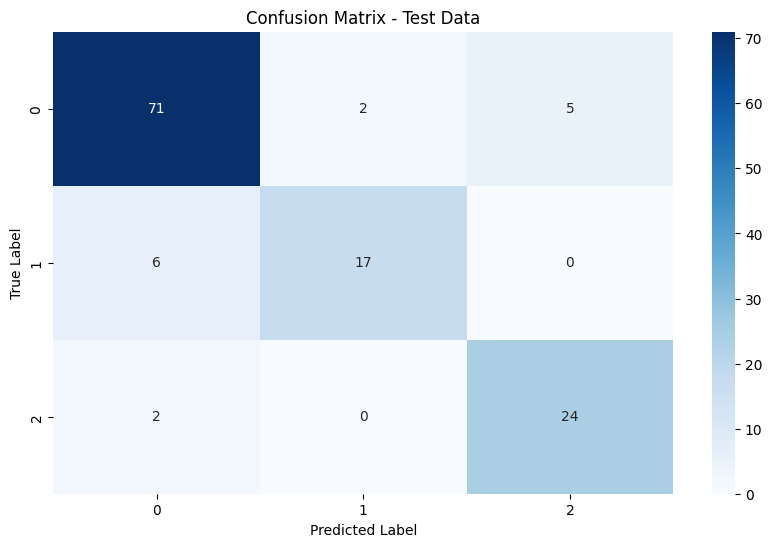

Training Metrics:
F1 Score: 0.9814290266335916

Test Metrics:
Accuracy: 0.8818897637795275
Precision: 0.883444524177293
Recall: 0.8818897637795275
F1 Score: 0.8807695071700288
Best Parameters:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 32}


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': range(1,110),  # Adjust as needed
    'max_depth': [None, 10, 20],  # Adjust as needed
    'min_samples_split': [2, 5, 10],  # Adjust as needed
    'min_samples_leaf': [1, 2, 4],  # Adjust as needed
}

# Instantiate RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

# Make predictions on training and test data
train_predictions = best_rf_classifier.predict(x_train)
test_predictions = best_rf_classifier.predict(x_test)


# Plot confusion matrix for test data
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

train_f1 = f1_score(y_train, train_predictions, average='weighted')
print("Training Metrics:")
print(f"F1 Score: {train_f1}")

# Calculate and print metrics for test data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')
print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")

# Print the best parameters found by GridSearchCV
print("Best Parameters:")
print(grid_search.best_params_)

[]

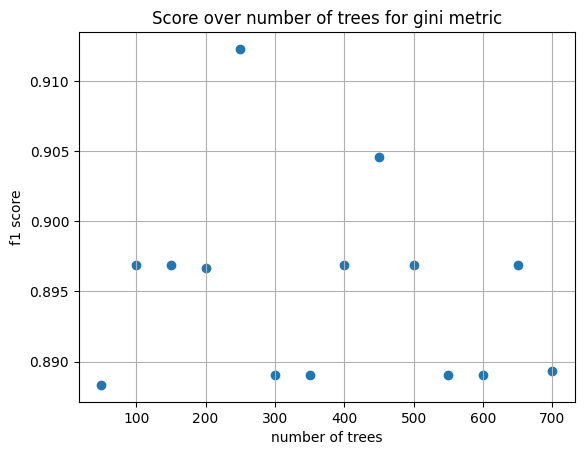

In [33]:
scores =[]
num_of_trees = []
for i in range(1,15):
    rf = ensemble.RandomForestClassifier(n_estimators=50*i,criterion='entropy')
    rf.fit(x_train,np.squeeze(y_train))
    preds = rf.predict(x_test)
    scores.append(f1_score(np.squeeze(y_test),preds, average = 'weighted'))
    num_of_trees.append(i*50)


plt.scatter(num_of_trees,scores)
plt.ylabel("f1 score")
plt.xlabel("number of trees")
plt.title('Score over number of trees for gini metric')
plt.grid()
plt.plot()

# Applying SVM with different kernels


<font color='magenta'>40.1, 40.2, 40.3, 40.4</font>

Using rbf kernel

In [34]:
rbf_kernel_svm = make_pipeline(StandardScaler(), SVC(kernel = "rbf", gamma = 0.1, C = 10))
rbf_kernel_svm.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=0.1))])

(127,)


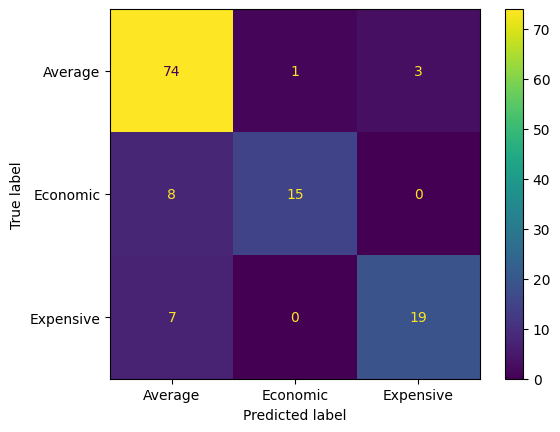

test f1 score: 0.8503937007874016
train f1 score: 0.8812664907651715
Accuracy: 0.8503937007874016
Precision: 0.8503937007874016
Recall: 0.8503937007874016


In [35]:
predictions = rbf_kernel_svm.predict(x_test)
print(predictions.shape)
cm = confusion_matrix(np.squeeze(y_test), predictions, labels=rbf_kernel_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rbf_kernel_svm.classes_)
disp.plot()
plt.show()
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
# Calculate precision
precision = precision_score(y_test, predictions, average='micro' )

# Calculate recall
recall = recall_score(y_test, predictions, average='micro')
print(f"test f1 score: {f1_score(y_test,predictions,average='micro')}")

predictions = rbf_kernel_svm.predict(x_train)
print(f"train f1 score: {f1_score(y_train,predictions,average='micro')}")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Applying GridSearch

both Random Search and Grid Search have their advantages and disadvantages. It's essential to consider the specific characteristics of the problem, the size of the search space, and the available computational resources when choosing between the two techniques for hyperparameter tuning in SVM with an RBF kernel.

In [36]:
# Define the parameter grid
param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100],  # Range of values for the regularization parameter C
    'svc__gamma': [0.01, 0.1, 1, 10, 100]  # Range of values for the gamma parameter
}

# Create the grid search object
grid_search = GridSearchCV(
    estimator=make_pipeline(StandardScaler(), SVC(kernel='rbf')),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the evaluation metric
    n_jobs=-1  # Use all available CPU cores for parallelization
)

# Fit the grid search
grid_search.fit(x_train, y_train)

# Retrieve the best model
best_rbf_kernel_svm = grid_search.best_estimator_
best_rbf_kernel_svm_param = grid_search.best_params_
print(f"best param: {best_rbf_kernel_svm_param}")

best param: {'svc__C': 100, 'svc__gamma': 0.01}


In [37]:
best_rbf_kernel_svm.fit(x_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, gamma=0.01))])

(127,)


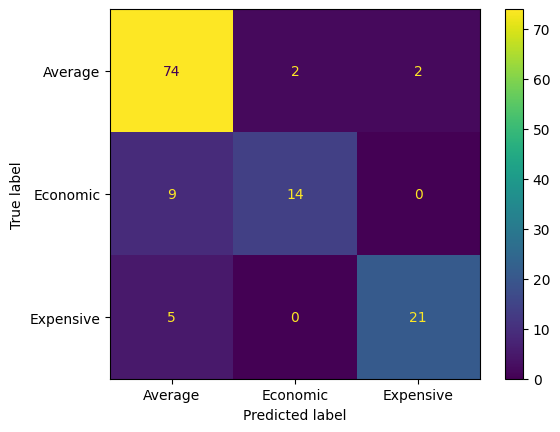

test f1 score: 0.853076405301052
train f1 score: 0.8593637063302638
Accuracy: 0.8582677165354331
Precision: 0.8618507049267063
Recall: 0.8582677165354331


In [38]:
predictions = best_rbf_kernel_svm.predict(x_test)
print(predictions.shape)
cm = confusion_matrix(np.squeeze(y_test), predictions, labels=best_rbf_kernel_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_rbf_kernel_svm.classes_)
disp.plot()
plt.show()
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
# Calculate precision
precision = precision_score(y_test, predictions, average='weighted' )

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"test f1 score: {f1_score(y_test,predictions,average='weighted')}")

predictions = best_rbf_kernel_svm.predict(x_train)
print(f"train f1 score: {f1_score(y_train,predictions,average='weighted')}")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Applying RandomSearch

In [39]:
# Define the parameter distributions
param_distributions = {
    'svc__C': reciprocal(0.01, 100),  # Continuous distribution for the regularization parameter C
    'svc__gamma': reciprocal(0.01, 100),  # Continuous distribution for the gamma parameter
}

# Create the random search object
random_search = RandomizedSearchCV(
    estimator=make_pipeline(StandardScaler(), SVC(kernel='rbf')),
    param_distributions=param_distributions,
    n_iter=50,  # Number of iterations (random samples)
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the evaluation metric
    n_jobs=-1,  # Use all available CPU cores for parallelization
    random_state=42  # Set random state for reproducibility
)

# Fit the random search
random_search.fit(x_train, y_train)

# Retrieve the best model
best_rbf_kernel_svm_random = random_search.best_estimator_

In [40]:
best_rbf_kernel_svm_random.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=12.164139351417068, gamma=0.019777828512462722))])

(127,)


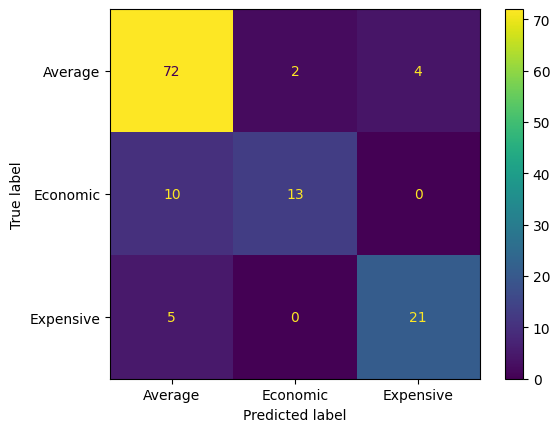

test f1 score: 0.8285144416052973
train f1 score: 0.8458321671496267
Accuracy: 0.8346456692913385
Precision: 0.8372051769390896
Recall: 0.8346456692913385


In [41]:
predictions = best_rbf_kernel_svm_random.predict(x_test)
print(predictions.shape)
cm = confusion_matrix(np.squeeze(y_test), predictions, labels=best_rbf_kernel_svm_random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_rbf_kernel_svm_random.classes_)
disp.plot()
plt.show()
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
# Calculate precision
precision = precision_score(y_test, predictions, average='weighted' )

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"test f1 score: {f1_score(y_test,predictions,average='weighted')}")

predictions = best_rbf_kernel_svm_random.predict(x_train)
print(f"train f1 score: {f1_score(y_train,predictions,average='weighted')}")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Using linear kernel

In [42]:
linear_kernel_svm = make_pipeline(StandardScaler(), SVC(kernel = "linear", gamma = 10, C = 0.01))
linear_kernel_svm.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.01, gamma=10, kernel='linear'))])

(127,)


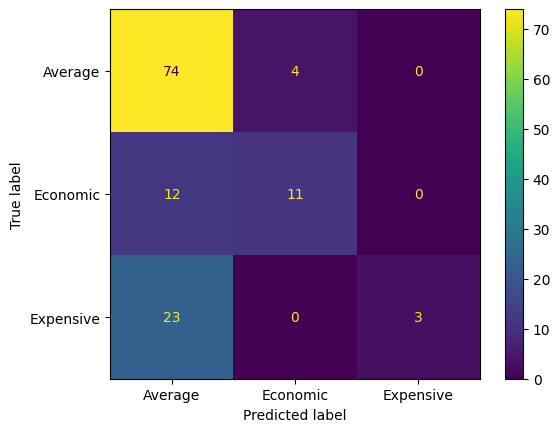

test f1 score: 0.6332891349556489
train f1 score: 0.6622740438772828
Accuracy: 0.6929133858267716
Precision: 0.7544944496616821
Recall: 0.6929133858267716


In [43]:
predictions = linear_kernel_svm.predict(x_test)
print(predictions.shape)
cm = confusion_matrix(np.squeeze(y_test), predictions, labels=linear_kernel_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=linear_kernel_svm.classes_)
disp.plot()
plt.show()
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"test f1 score: {f1_score(y_test,predictions,average='weighted')}")

predictions = linear_kernel_svm.predict(x_train)
print(f"train f1 score: {f1_score(y_train,predictions,average='weighted')}")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Now we use Gridsearch for finding best hyperparameter

In [44]:
# Define the parameter grid
param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100],  # Range of values for the regularization parameter C
    }

# Create the grid search object
grid_search = GridSearchCV(
    estimator=make_pipeline(StandardScaler(), SVC(kernel='linear')),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the evaluation metric
    n_jobs=-1  # Use all available CPU cores for parallelization
)

# Fit the grid search
grid_search.fit(x_train, y_train)

# Retrieve the best model
best_linear_kernel_svm = grid_search.best_estimator_

In [382]:
best_linear_kernel_svm.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, kernel='linear'))])

(127,)


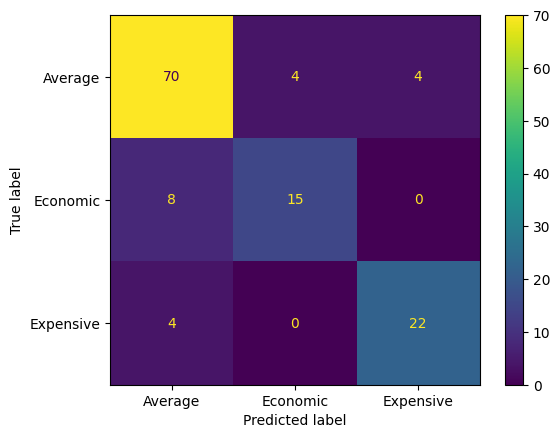

test f1 score: 0.8399887514060742
train f1 score: 0.8680058632267474
Accuracy: 0.84251968503937
Precision: 0.8404981148858318
Recall: 0.84251968503937


In [45]:
predictions = best_linear_kernel_svm.predict(x_test)
print(predictions.shape)
cm = confusion_matrix(np.squeeze(y_test), predictions, labels=best_linear_kernel_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_linear_kernel_svm.classes_)
disp.plot()
plt.show()
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"test f1 score: {f1_score(y_test,predictions,average='weighted')}")

predictions = best_linear_kernel_svm.predict(x_train)
print(f"train f1 score: {f1_score(y_train,predictions,average='weighted')}")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Now we use RandomSearch

In [46]:

# Define the parameter distributions
param_distributions = {
    'svc__C': uniform(0.01, 2),  # Continuous distribution for the regularization parameter C
    'svc__kernel': ['linear'],  # Fixing the kernel type as linear
    'svc__class_weight': [None, 'balanced'],  # Class weight (default: None), can be 'balanced' to adjust for class imbalance
    'svc__tol': uniform(1e-5, 1e-2),  # Continuous distribution for tolerance for stopping criteria
    'svc__max_iter': randint(2, 300000),  # Discrete uniform distribution for maximum number of iterations
}

# Create the random search object
random_search = RandomizedSearchCV(
    estimator=make_pipeline(StandardScaler(), SVC()),
    param_distributions=param_distributions,
    n_iter=50,  # Number of iterations (random samples)
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the evaluation metric
    n_jobs=-1,  # Use all available CPU cores for parallelization
    random_state=42  # Set random state for reproducibility
)

# Fit the random search
random_search.fit(x_train, y_train)

# Retrieve the best model
best_linear_kernel_svm_random = random_search.best_estimator_

In [47]:
best_linear_kernel_svm_random.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1.994423118582435, kernel='linear', max_iter=184781,
                     tol=0.006126531604882809))])

(127,)


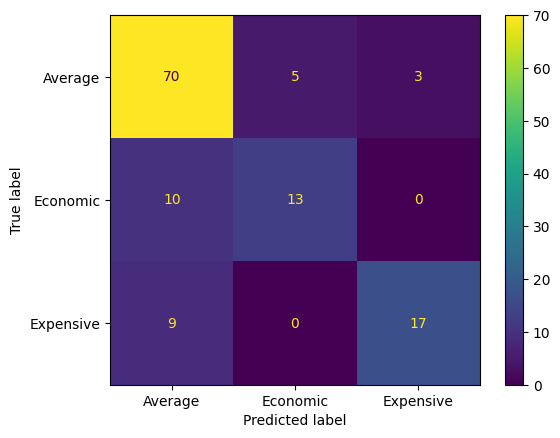

test f1 score: 0.7810392024794691
train f1 score: 0.8227164590967497
Accuracy: 0.7874015748031497
Precision: 0.7878694938413596
Recall: 0.7874015748031497


In [48]:
predictions = best_linear_kernel_svm_random.predict(x_test)
print(predictions.shape)
cm = confusion_matrix(np.squeeze(y_test), predictions, labels=best_linear_kernel_svm_random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_linear_kernel_svm_random.classes_)
disp.plot()
plt.show()
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"test f1 score: {f1_score(y_test,predictions,average='weighted')}")

predictions = best_linear_kernel_svm_random.predict(x_train)
print(f"train f1 score: {f1_score(y_train,predictions,average='weighted')}")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Evaluation

As we can see, the values of precision, recall, accuracy, and f1 score are around 80 percent which indicates that all the ml models are capable of performing well on this dataset.

A high recall indicates that the model captures a larger proportion of positive instances, minimizing false negatives.

A high F1 score indicates both high precision and high recall, reflecting a good balance between identifying positive instances correctly and minimizing false positives and false negatives.

A high accuracy indicates that the model makes a high proportion of correct predictions across all classes.

A high precision indicates that the model makes fewer false positive predictions, meaning it is more selective in correctly identifying positive instances.